### Introduction to Neural Networks 

<img src = "Introduction.jpg">
<img src = "Introduction2.jpg">
<img src = "Introduction3.jpg">
<img src = "Introduction4.jpg">
<img src = "Introduction5.jpg">
<img src = "Introduction6.jpg">
<img src = "Introduction7.jpg">
<img src = "Introduction8.jpg">
<img src = "Introduction9.jpg">
<img src = "Introduction10.jpg">
<img src = "Introduction11.jpg">
<img src = "Introduction12.jpg">
<img src = "Introduction13.jpg">
<img src = "Introduction14.jpg">
<img src = "Introduction15.jpg">
<img src = "Introduction16.jpg">
<img src = "Introduction17.jpg">
<img src = "Introduction18.jpg">
<img src = "Introduction19.jpg">
<img src = "Introduction20.jpg">
<img src = "Introduction21.jpg">
<img src = "Introduction22.jpg">
<img src = "Introduction23.jpg">
<img src = "Introduction24.jpg">
<img src = "Introduction25.jpg">

### optimization-and-gradient-descent

<img src = "Gradient Descent.jpg">
<img src = "Gradient Descent1.jpg">
<img src = "Gradient Descent2.jpg">
<img src = "Gradient Descent3.jpg">
<img src = "Gradient Descent4.jpg">
<img src = "Gradient Descent5.jpg">
<img src = "Gradient Descent6.jpg">
<img src = "Gradient Descent7.jpg">
<img src = "Gradient Descent8.jpg">
<img src = "Gradient Descent9.jpg">

# Machine Learning Foundation

## Course 5, Part a: Gradient Descent DEMO

## Overview
In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.

In [1]:
# Preliminaries - packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [3]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.

## Exercise:
Solve the problem two ways: 
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.

In [7]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [8]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Solving by Gradient Descent


For most numerical problems, we don't / can't know the underlying analytical solution. This is because we only arrive at analytical solutions by solving the equations mathematically, with pen and paper. That is more often than not just impossible. Fortunately, we have a way of converging to an approximate solution, by using **Gradient Descent**.


We will explore this very useful method because Neural Networks, along with many other complicated algorithms, are trained using Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate and other parameters.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

## Exercise

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.
1. Find examples where the learning rate is too high, too low, and "just right".
1. Look at plots of loss function under these conditions.



In [22]:
## Parameters to play with 
learning_rate = 1e-3
num_iter = 10000
theta_initial = np.array([3,3,3])

In [23]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    theta_path = np.zeros((num_iter+1,3))
    theta_path[0,:]= theta_initial

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        grad_vec = grad_vec
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]=theta
    return theta_path, loss_vec

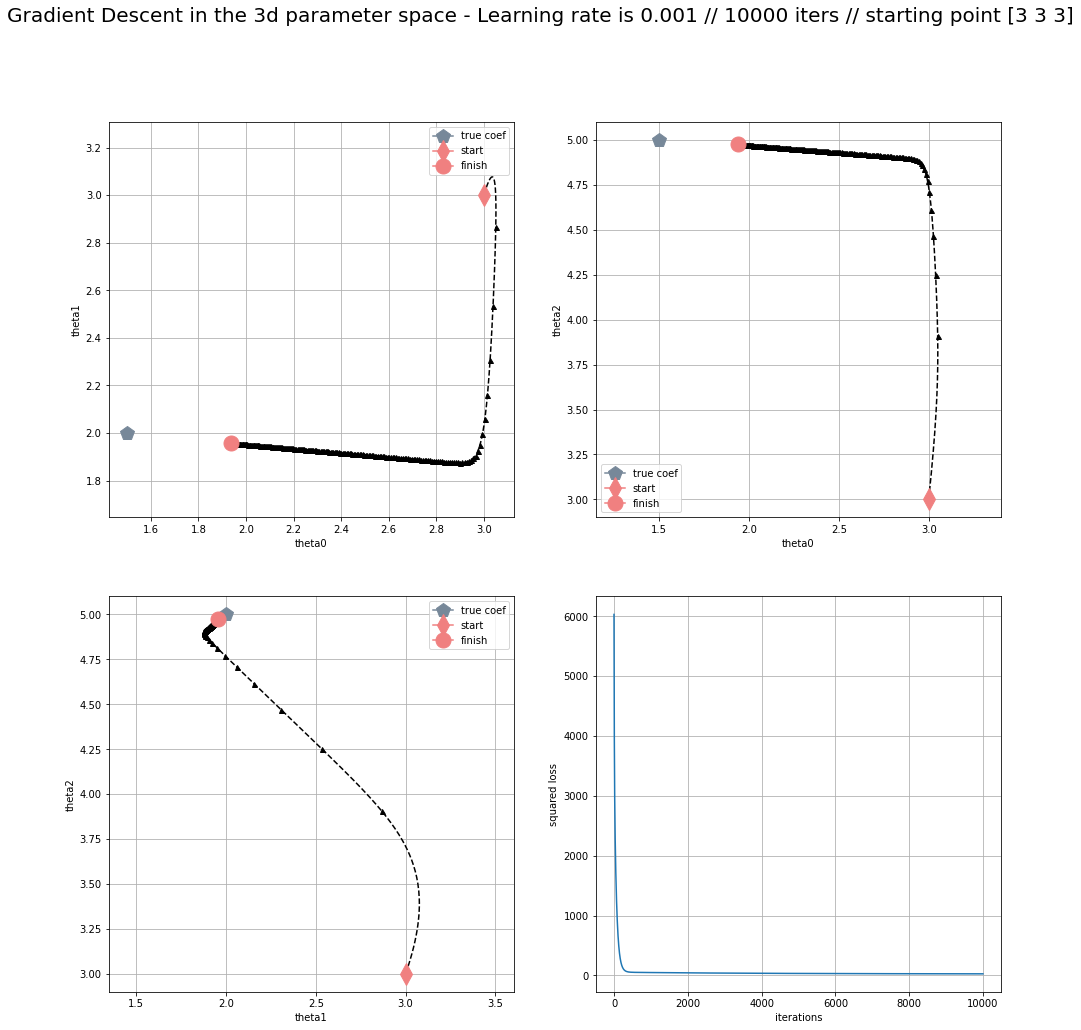

In [24]:
true_coef = [b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)
    

theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)



## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.  

## Exercise
The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

1. Run the code and plot the graphs.  What do you notice?
2. Modify the code so that it randomly re-orders the data.  How do the sample trajectories compare?

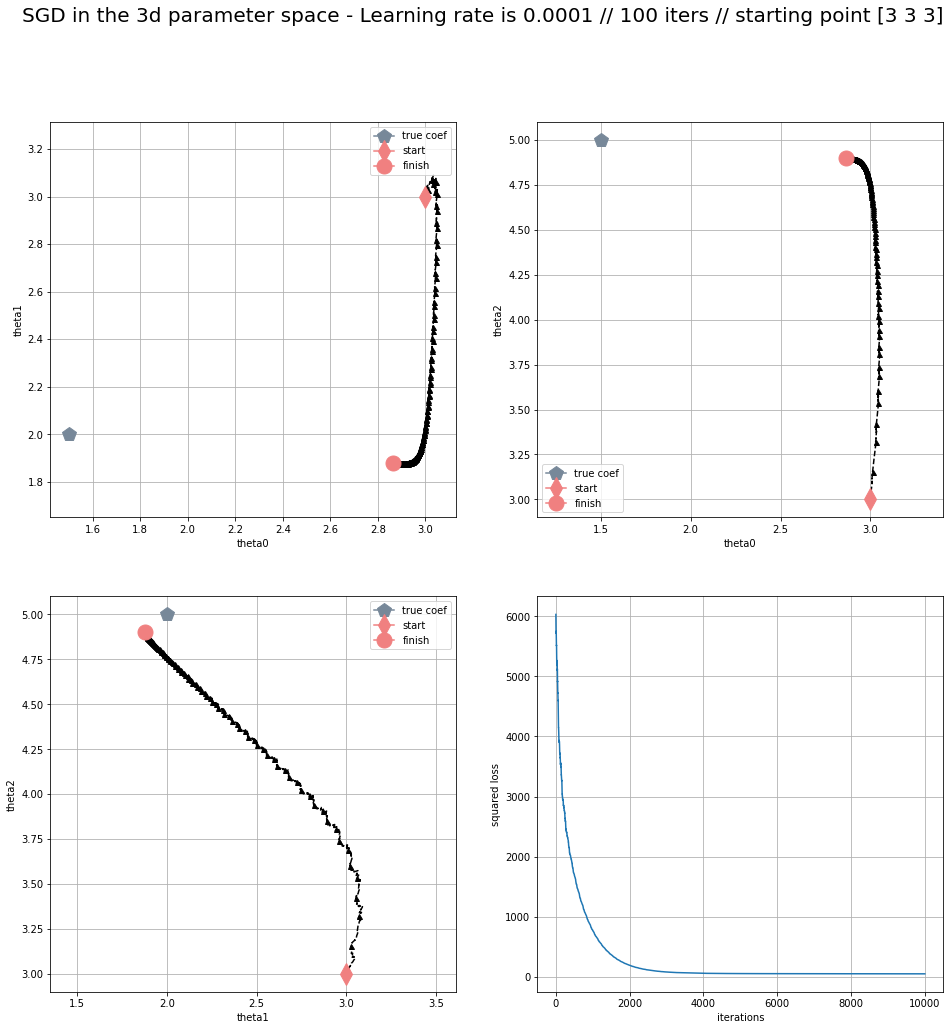

In [25]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    # below are different in STOCHASTIC gradient descent
    theta_path = np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:] = theta_initial
    loss_vec = np.zeros(num_iter*num_obs)

    ## Main SGD loop
    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            count+=1
            y_pred = np.dot(theta.T,x_mat.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
            theta = theta + learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3, 3, 3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, 
         num_iter, theta_initial, 'SGD')

Play with the parameters below and observe the trajectory it results in

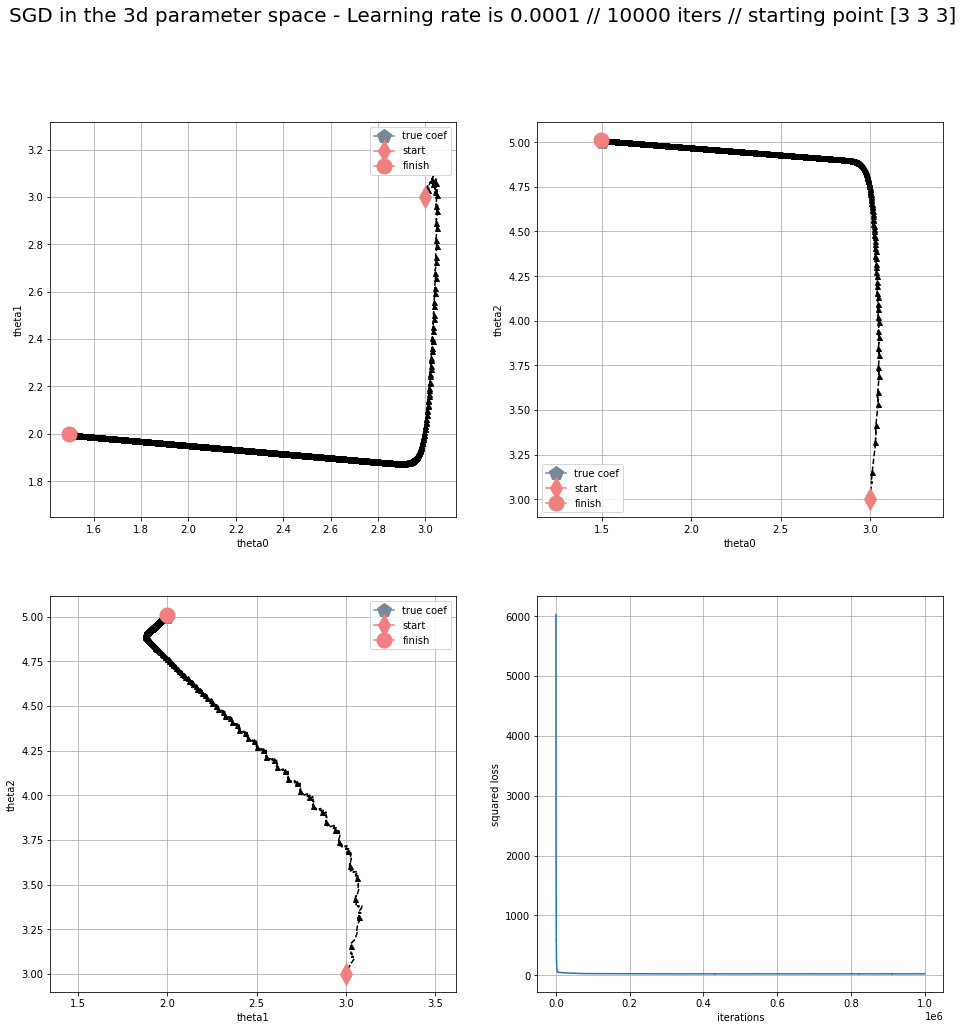

In [27]:
## Parameters to play with
learning_rate = 1e-4
num_iter = 10000
theta_initial = np.array([3,3,3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, 
         theta_initial, 'SGD')

---

# Machine Learning Foundation

## Course 5, Part b: Intro to Neural Networks LAB

## Exercise: neurons as logic gates
In this exercise we will experiment with neuron computations.  We will show how to represent basic logic functions like AND, OR, and XOR using single neurons (or more complicated structures).  Finally, at the end we will walk through how to represent neural networks as a chain of matrix computations.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [29]:
## Quickly define the sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

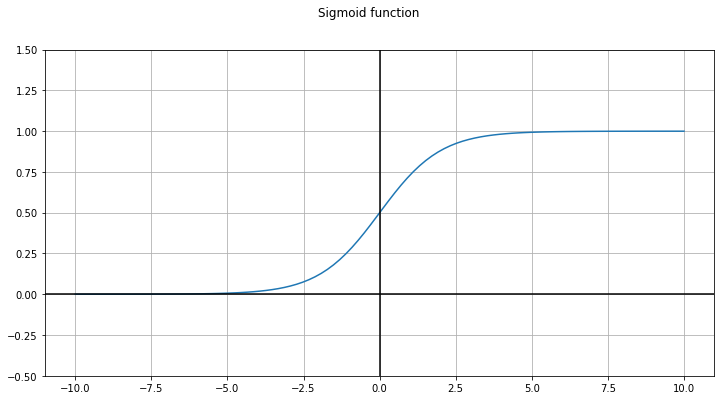

In [30]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### Thinking of neurons as boolean logic gates

A logic gate takes in two boolean (true/false or 1/0) inputs, and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs, (0, 0), (0, 1), (1,0), and (1, 1). For example, let's look at the truth table for an "OR" gate:

### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

![](logic01.png)

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by ? marks above), such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be? 
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

![](logic02.png)

In [31]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [32]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

This matches! Great! Now you try finding the appropriate weight values for each truth table. Try not to guess and check- think through it logically and try to derive values that work.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

## Exercise 1
Determine what values for the neurons would make this function as an AND gate.

In [33]:
# TO DO: Fill in the w1, w2, and b parameters such that 
# the truth table matches
w1 = 11
w2 = 10
b = -20
and_gate = logic_gate(w1, w2, b)
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


## Exercise 2
Do the same for the NOR gate and the NAND gate.

### NOR (Not Or) Gate

<table>

<tr>
<th colspan="3">NOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [34]:
# TO DO: Fill in the w1, w2, and b parameters such that the 
# truth table matches
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


### NAND (Not And) Gate

<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [35]:
# TO DO: Fill in the w1, w2, and b parameters such that the 
# truth table matches
w1 = -11
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## The limits of single neurons

If you've taken computer science courses, you may know that the XOR gates are the basis of computation. They can be used as so-called "half-adders", the foundation of being able to add numbers together. Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Can we create a set of weights such that a single neuron can output this property?

It turns out we cannot, since single neurons can't correlate inputs. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

![](logic03.png)

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates then get passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate.

In [36]:
# Make sure we have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks as Matrix Computations

We discussed previously how the feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

![](data/FF_NN.png)

## Exercise 3
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards.

In [47]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],
                     [.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


In [48]:
z_2 = np.dot(x_in,W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [49]:
a_2 = sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [50]:
z_3 = np.dot(a_2,W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [51]:
a_3 = sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [52]:
z_4 = np.dot(a_3,W_3)
z_4

array([ 2.04146788,  1.04718238, -3.47867612])

In [53]:
y_out = soft_max_vec(z_4)
y_out

array([0.72780576, 0.26927918, 0.00291506])

In [54]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [55]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [56]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

---

### Introduction to Backpropagation in Neural Networks

<img src = "Back-propagation.jpg">
<img src = "Back-propagation1.jpg">
<img src = "Back-propagation2.jpg">
<img src = "Back-propagation3.jpg">
<img src = "Back-propagation4.jpg">
<img src = "Back-propagation5.jpg">
<img src = "Back-propagation6.jpg">
<img src = "Back-propagation7.jpg">
<img src = "Back-propagation8.jpg">

# Machine Learning Foundation

## Course 5, Part c: Backpropagation DEMO

## Overview
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [57]:
#Setup
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will prepare code to create a multi-layer perceptron with a single hidden layer (with 4 nodes) and train it via back-propagation.  We will take the following steps:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once the code is running, we can address the following questions:
- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (5000, 3)
shape of y is (5000,)


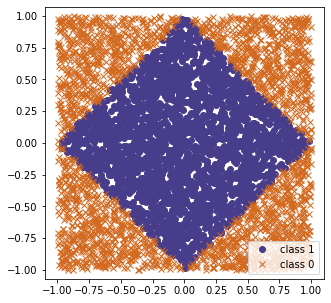

In [70]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 5000
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [71]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy')

iteration 0, log loss is 0.8111, accuracy is 0.5016
iteration 200, log loss is 0.2800, accuracy is 0.906
iteration 400, log loss is 0.1570, accuracy is 0.975
iteration 600, log loss is 0.1345, accuracy is 0.984
iteration 800, log loss is 0.1228, accuracy is 0.9884
iteration 1000, log loss is 0.1148, accuracy is 0.9882
iteration 1200, log loss is 0.1087, accuracy is 0.9882
iteration 1400, log loss is 0.1054, accuracy is 0.9858
iteration 1600, log loss is 0.1116, accuracy is 0.9586
iteration 1800, log loss is 0.1160, accuracy is 0.9512
iteration 2000, log loss is 0.1162, accuracy is 0.949
iteration 2200, log loss is 0.1160, accuracy is 0.949
iteration 2400, log loss is 0.1157, accuracy is 0.9486
iteration 2600, log loss is 0.1156, accuracy is 0.9482
iteration 2800, log loss is 0.1154, accuracy is 0.9478
iteration 3000, log loss is 0.1154, accuracy is 0.9474
iteration 3200, log loss is 0.1153, accuracy is 0.947
iteration 3400, log loss is 0.1153, accuracy is 0.9468
iteration 3600, log los

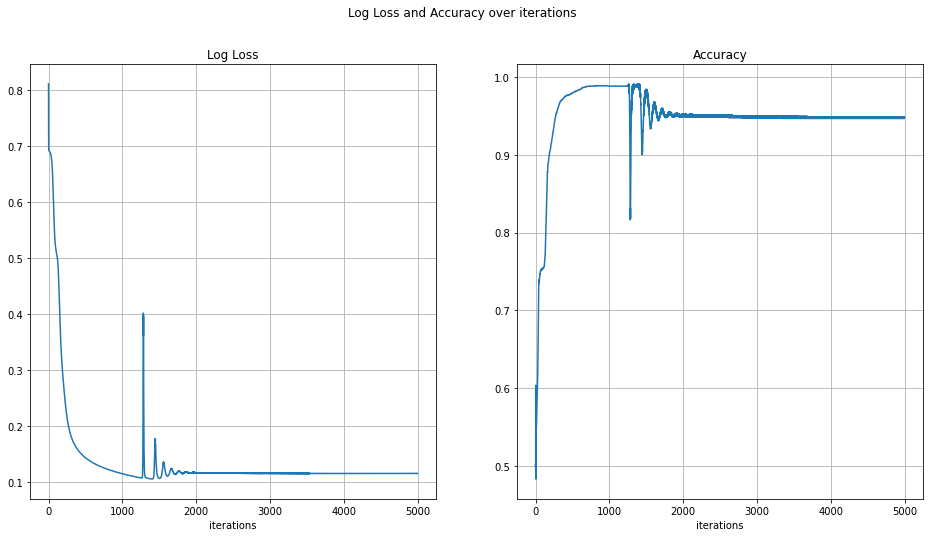

In [79]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad 
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow

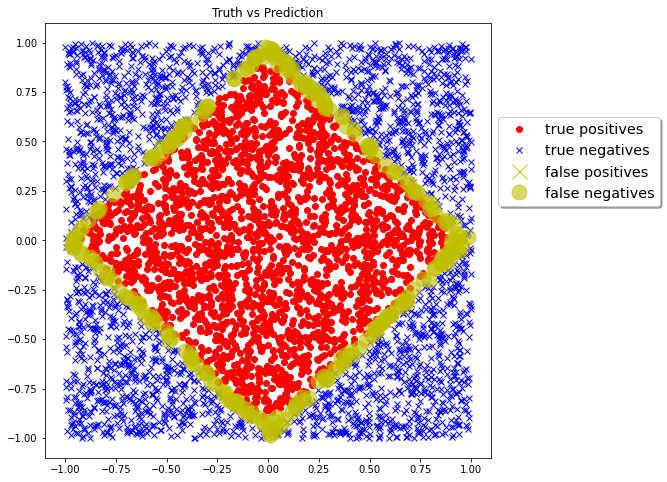

In [80]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large')

---

### Other Activation Functions

<img src = "Activation Functions.jpg">
<img src = "Activation Functions1.jpg">
<img src = "Activation Functions2.jpg">
<img src = "Activation Functions3.jpg">
<img src = "Activation Functions4.jpg">
<img src = "Activation Functions5.jpg">
<img src = "Activation Functions6.jpg">
<img src = "Activation Functions7.jpg">
<img src = "Activation Functions8.jpg">
<img src = "Activation Functions9.jpg">

### Regularization Techniques for Deep Learning

<img src = "Regularization.jpg">
<img src = "Regularization1.jpg">
<img src = "Regularization2.jpg">
<img src = "Regularization3.jpg">
<img src = "Regularization4.jpg">
<img src = "Regularization5.jpg">
<img src = "Regularization6.jpg">
<img src = "Regularization7.jpg">
<img src = "Regularization8.jpg">